# Rev 스타일/기능 변경
- 색각이상 친화 팔레트 적용 (seaborn 'colorblind', matplotlib 'tab10'/'cividis').
- 범례 대비/가독성 강화 (배경/테두리/폰트).
- 저장 경로는 기존과 동일(`LaTeX/Figures/...`) 권장.



In [20]:
# 전역 스타일 설정
import matplotlib as mpl
import matplotlib.pyplot as plt
try:
    import seaborn as sns
    sns.set_palette('colorblind')
except Exception:
    pass
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=plt.get_cmap('tab10').colors)
mpl.rcParams['image.cmap'] = 'cividis'
mpl.rcParams['lines.linewidth'] = 2.0
mpl.rcParams['axes.labelsize'] = 12
mpl.rcParams['axes.titlesize'] = 13
mpl.rcParams['legend.frameon'] = True
mpl.rcParams['legend.facecolor'] = 'white'
mpl.rcParams['legend.edgecolor'] = 'black'
mpl.rcParams['legend.framealpha'] = 0.9
mpl.rcParams['legend.fontsize'] = 10



In [21]:
import os
import time
import string

import numpy as np
import pandas as pd

from datetime import datetime, timedelta
from collections import Counter

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.dates as mdates

from tqdm import tqdm

# Font
from matplotlib import font_manager
font_path = "/workspace/fonts/"
font_list = os.listdir(font_path)
for font_file in font_list:
    try:
        font_manager.fontManager.addfont(font_path + font_file)
    except:
        raise Exception(f"Cannot Load {font_path+font_file}")

In [22]:
df = pd.read_csv('./Data_final/total_results_2048_0.6.csv', index_col=0)

import geopandas as gpd

df_geo = gpd.read_file('/Data/Backup/Data/Geo/sido_20240213/ctp_rvn.shp', encoding='euc-kr')
geog = df_geo.to_crs(epsg=4326)

sorted_name = ['Incheon', 'Anheung', 'Boryeong', 'Gunsan', 'Wido', 'Mokpo', 'Heuksando', 'Chujado', 'Jeju', 'Seogwipo', 
               'Wando', 'Geomundo', 'Yeosu', 'Tongyeong', 'Gadeokdo', 'Busan', 'Ulsan', 'Pohang', 'Mukho', 'Sokcho', 'Ulleungdo']
dict_name_to_index = {}
for i, n in enumerate(sorted_name):
    dict_name_to_index[n] = i

# df = df.set_index('station').loc[sorted_name][::-1]

In [23]:
# df.columns
tg_cols = ['yearly slr (mm/yr) CEEMDAN', 'yearly slr (mm/yr) EEMD', 'yearly slr (mm/yr) Linear']

In [24]:
df

,latitude,longitude,date start,date end,data length (year),yearly slr (mm/yr) CEEMDAN,yearly slr (mm/yr) EEMD,yearly slr (mm/yr) Linear
station name,,,,,,,,
Anheung,36.673611,126.132222,1989-01-16,2020-12-16,31.936986,2.064728,1.876882,2.848369
Boryeong,36.406389,126.486111,1986-01-16,2020-12-16,34.939726,2.747323,2.593289,3.271571
Busan,35.096111,129.035556,1975-01-16,2020-12-16,45.947945,2.653208,2.322311,2.789885
Chujado,33.961667,126.300278,1986-01-16,2020-12-16,34.939726,2.449173,1.932183,2.937847
Gadeokdo,35.024722,128.810833,1983-01-16,2020-12-16,37.942466,2.197155,1.947798,2.648716
Geomundo,34.028333,127.309167,1985-01-16,2020-12-16,35.939726,1.950057,1.101613,2.909375
Gunsan,35.975556,126.563333,1983-01-16,2020-12-16,37.942466,2.515957,2.477159,3.208162
Heuksando,34.683889,125.436389,1982-01-16,2020-12-16,38.942466,2.555412,2.778307,3.040568
Incheon,37.451944,126.592222,1978-01-16,2020-12-16,42.945205,3.170525,2.811090,3.269977


In [25]:
df_gdf

,latitude,longitude,date start,date end,data length (year),yearly slr (mm/yr) CEEMDAN,yearly slr (mm/yr) EEMD,yearly slr (mm/yr) Linear,geometry
station name,,,,,,,,,
Ulleungdo,37.491389,130.913611,1983-01-16,2020-12-16,37.942466,4.069621,3.583321,4.206511,POINT (546172.847 450750.61)
Sokcho,38.207222,128.594167,1977-01-16,2020-12-16,43.945205,2.720371,2.861718,3.004226,POINT (339628.967 524202.932)
Mukho,37.550278,129.116389,1977-01-16,2020-12-16,43.945205,2.569101,2.012397,2.867610,POINT (387028.128 452190.097)
Pohang,36.047222,129.383889,1977-01-16,2020-12-16,43.945205,2.434968,2.374580,3.059947,POINT (414831.233 285915.176)
Ulsan,35.501944,129.387222,1977-01-16,2020-12-16,43.945205,2.168456,2.164616,2.697370,POINT (416606.554 225404.554)
Busan,35.096111,129.035556,1975-01-16,2020-12-16,45.947945,2.653208,2.322311,2.789885,POINT (385617.986 179653.794)
Gadeokdo,35.024722,128.810833,1983-01-16,2020-12-16,37.942466,2.197155,1.947798,2.648716,POINT (365267.364 171336.752)
Tongyeong,34.827500,128.434722,1979-01-16,2020-12-16,41.945205,1.867275,1.794203,2.300745,POINT (331252.223 148896.534)
Yeosu,34.747222,127.765556,1969-01-16,2020-12-16,51.950685,1.989255,1.286743,2.252925,POINT (270101.18 139319.066)


In [42]:
# 색상 스케일 설정 옵션
import numpy as np
from matplotlib.colors import BoundaryNorm, Normalize

COLOR_MODE = 'boundary'  # 'boundary', 'rescale', 'standard'
BOUNDARY_BREAKS = [1.85, 2.0, 2.15, 2.3, 2.45, 2.6, 2.75, 2.9, 3.05, 3.2, 3.35, 3.5, 3.7]
RESCALE_VMIN = 1.9  # None이면 자동(5th percentile)
RESCALE_VMAX = 3.3  # None이면 자동(95th percentile)


def get_color_settings(values, mode=COLOR_MODE):
    v = np.asarray(values).astype(float)
    base_cmap = plt.cm.get_cmap('plasma', 256)
    if mode == 'boundary':
        edges = np.array(sorted(set(BOUNDARY_BREAKS)), dtype=float)
        edges = edges[~np.isnan(edges)]
        if edges.size == 0:
            edges = np.linspace(v.min(), v.max(), 8)
        if edges[0] > v.min():
            edges = np.concatenate(([v.min()], edges))
        extend = 'neither'
        if edges[-1] < v.max():
            extend = 'max'
        norm = BoundaryNorm(edges, base_cmap.N, clip=False)
        cmap = base_cmap.with_extremes(over='orangered') if extend != 'neither' else base_cmap
        ticks = np.round(np.unique(edges), 2)
        return cmap, norm, ticks, extend
    if mode == 'rescale':
        vmin = RESCALE_VMIN if RESCALE_VMIN is not None else np.percentile(v, 5)
        vmax = RESCALE_VMAX if RESCALE_VMAX is not None else np.percentile(v, 95)
        norm = Normalize(vmin=vmin, vmax=vmax)
        ticks = np.round(np.linspace(vmin, vmax, 5), 2)
        return base_cmap, norm, ticks, 'neither'
    # default
    norm = Normalize(vmin=v.min(), vmax=v.max())
    ticks = np.round(np.linspace(v.min(), v.max(), 5), 2)
    return base_cmap, norm, ticks, 'neither'





/tmp/ipykernel_20724/3307564986.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  base_cmap = plt.cm.get_cmap('plasma', 256)


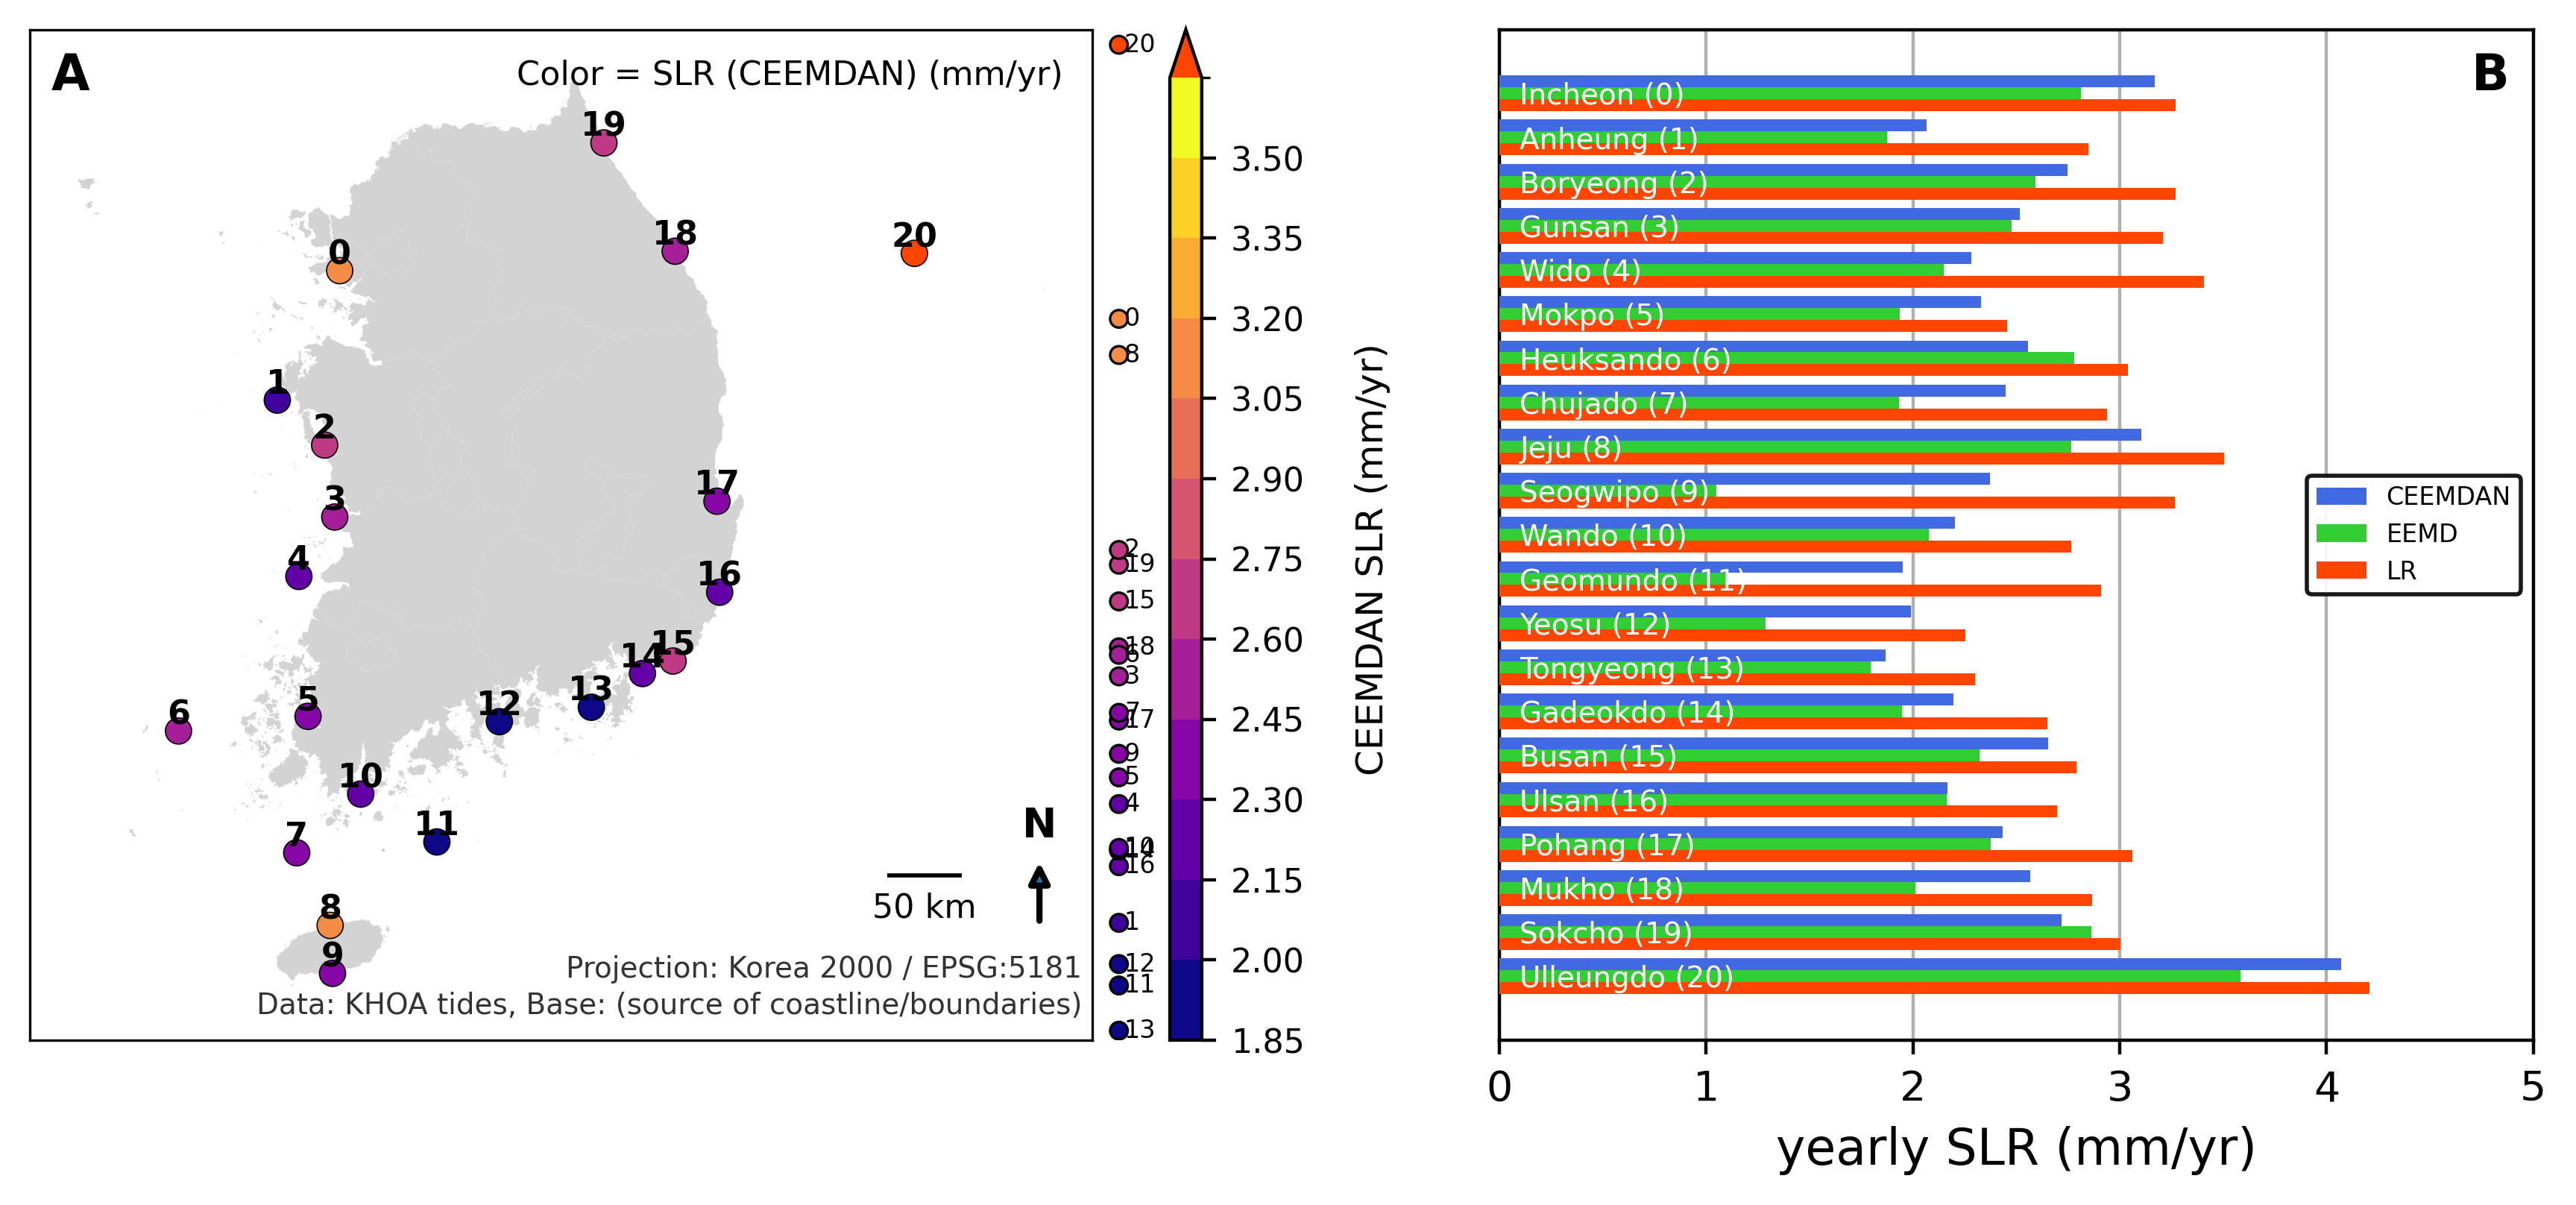

In [60]:
from shapely.geometry import Point
from matplotlib.colors import Normalize, TwoSlopeNorm
from mpl_toolkits.axes_grid1 import make_axes_locatable

SCALE = 10
fig = plt.figure(figsize=(11, 4.4), dpi=400)

spec = gridspec.GridSpec(ncols=12, nrows=1, figure=fig, wspace=0.25)

_split = 6  # columns dedicated to the map panel
axes = []

# 0) 권장: 투영 좌표계로 변환 (지도 축 ax 만들기 직전/직후 어느 때나 가능)
#   원 데이터가 WGS84 경위도라면:
geog_proj = geog.to_crs(5181)  # Korea 2000 / Unified CS (TM)
df_gdf = gpd.GeoDataFrame(df.copy(),
                          geometry=gpd.points_from_xy(df.longitude, df.latitude),
                          crs=4326).to_crs(5181)
df_gdf = df_gdf.loc[sorted_name[::-1]]
df = df.loc[sorted_name[::-1]]

# 1) 지도 그리기 (투영계)
ax = fig.add_subplot(spec[0, :_split])
ax.text(.02, .94, 'A', transform=ax.transAxes, size=12, weight='bold')

# geog_proj.plot(ax=ax, color='mediumseagreen', alpha=1.)
geog_proj.plot(ax=ax, color='lightgray', alpha=1.)


# ---- 데이터 준비
slr = df['yearly slr (mm/yr) CEEMDAN'].to_numpy()
lon = df_gdf.geometry.x.values
lat = df_gdf.geometry.y.values

# ---- 컬러 스케일 설정
if (np.nanmin(slr) < 0) and (np.nanmax(slr) > 0):
    cmap = plt.get_cmap('RdBu_r')
    norm = TwoSlopeNorm(vmin=np.nanmin(slr), vcenter=0.0, vmax=np.nanmax(slr))
    cb_ticks = np.round(np.linspace(np.nanmin(slr), np.nanmax(slr), 7), 2)
    cb_extend = 'neither'
else:
    cmap, norm, cb_ticks, cb_extend = get_color_settings(slr)

# ---- 산점도: 크기 고정(s), 색상으로 SLR 인코딩
S = 40  # 보기 좋은 고정 크기(조정 가능)
sct = ax.scatter(lon, lat,
                 s=S, c=slr,
                 cmap=cmap, norm=norm,
                 edgecolors='black', linewidths=0.3, zorder=5)

divider = make_axes_locatable(ax)
scatter_ax = divider.append_axes("right", size="2.5%", pad=0.05)
cb_ax = divider.append_axes("right", size="3%", pad=0.12)

for i in range(df_gdf.shape[0]):
    xi, yi = lon[i], lat[i]
    if i == 15:
        # ⚠️ geog.crs가 투영좌표(미터)이면 m 단위로, 경위도면 degree로 살짝 이동
        bump = 80000 if geog.crs.is_projected else 0.2
        xi += bump
    ax.text(xi, yi, 20-i, weight='bold', ha='center', va='bottom', fontsize=8, zorder=6)


# ---- 사이즈 범례(legend1) 제거하고 → 컬러바로 대체
# if 'legend1' in locals(): legend1.remove()
cb_kwargs = dict(cax=cb_ax)
if cb_extend and cb_extend != 'neither':
    cb_kwargs['extend'] = cb_extend
cb = plt.colorbar(sct, **cb_kwargs)
cb.ax.set_ylabel('CEEMDAN SLR (mm/yr)', fontsize=9, labelpad=12)
if cb_ticks is not None and len(cb_ticks) > 0:
    ticks = np.unique(np.round(cb_ticks, 2))
    if cb_extend in ('max', 'both') and len(ticks) > 1:
        ticks = ticks[:-1]
    cb.set_ticks(ticks)
    cb.ax.set_yticklabels([f"{t:.2f}" for t in ticks], fontsize=8)
cb.ax.yaxis.set_ticks_position('right')
cb.ax.yaxis.set_label_position('right')

# 컬러바 옆에 값/번호 표시
scatter_colors = cmap(norm(slr)) if hasattr(norm, '__call__') else ['white'] * len(slr)
y_min, y_max = cb.ax.get_ylim()
margin = (y_max - y_min) * 0.015
scatter_positions = []
for i, value in enumerate(slr):
    y_val = min(value, y_max - margin)
    scatter_positions.append((y_val, 20 - i))

scatter_ax.scatter(np.full(len(scatter_positions), 0.10),
                   [y for y, _ in scatter_positions],
                   s=18, c=scatter_colors,
                   edgecolors='black', linewidths=0.6, zorder=3)

for y_val, idx_label in scatter_positions:
    scatter_ax.text(0.24, y_val, f"{idx_label}", fontsize=6, va='center')

scatter_ax.set_ylim(cb.ax.get_ylim())
scatter_ax.set_xlim(-0.2, 0.5)
scatter_ax.set_xticks([])
# scatter_ax.set_yticks(cb.get_ticks())
scatter_ax.set_yticks([])
# scatter_ax.set_yticklabels([f"{t:.2f}" for t in cb.get_ticks()], fontsize=7)
scatter_ax.yaxis.set_ticks_position('right')
scatter_ax.yaxis.set_label_position('right')
scatter_ax.set_ylabel('', fontsize=7)
# scatter_ax.set_ylabel('SLR (mm/yr)', fontsize=7)
for spine in scatter_ax.spines.values():
    spine.set_visible(False)


############

# 2) 스케일바 (AnchoredSizeBar)
from matplotlib.offsetbox import AnchoredOffsetbox, AuxTransformBox, VPacker, TextArea
from matplotlib_scalebar.scalebar import ScaleBar  # pip install matplotlib-scalebar

# 투영 좌표(미터 단위)이므로 간단히 사용 가능
# scalebar = ScaleBar(dx=1, units='m', dimension='si-length', length_fraction=0.2, location='lower right', pad=2, frameon=False)
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
import matplotlib.font_manager as fm

fontprops = fm.FontProperties(size=8)

# pad=0.1은 x축 쪽만, vertical offset은 labelpad로 조절
scalebar = AnchoredSizeBar(ax.transData, 50000,  # 50 km
                           '50 km', 'lower right',
                           pad=3.4, sep=4,  # pad: 바와 축 간, sep: 바와 라벨 간
                           color='black', frameon=False,
                           size_vertical=0.8,
                           fontproperties=fontprops)

ax.add_artist(scalebar)

# 3) 북쪽표시(North arrow)
def add_north_arrow(ax, x, y, size=50000, text='N'):
    ax.annotate('', xy=(x, y+size), xytext=(x, y),
                arrowprops=dict(arrowstyle='-|>', lw=1.5))
    ax.text(x, y+size*1.1, text, ha='center', va='bottom', fontsize=10, weight='bold')

# 지도 범위의 좌하단 근처에 배치(투영좌표라서 m 단위)
xmin, xmax = ax.get_xlim(); ymin, ymax = ax.get_ylim()
add_north_arrow(ax, x=xmax - 0.05*(xmax-xmin), y=ymin + 0.11*(ymax-ymin))

# 4) 범례
# 지도 자체 범례는 컬러바와 보조 플롯으로 대체

# 6) 눈금/그리드(투영좌표 기준 그리드) 또는 경위도 그리드
ax.grid(True, alpha=0.2, lw=0.5)

# 만약 경위도 그리드를 원하면, 지도는 투영상태로 두되 외곽에 경위도 라벨만 추가(간단법: 부축)
# 라벨을 캡션으로 대체해도 무방합니다.

# 7) 출처/저작권(Attribution)
ax.set_xticks([])
ax.set_yticks([])
ax.tick_params(bottom=False, left=False, labelbottom=False, labelleft=False)
ax.text(0.99, 0.056, 'Projection: Korea 2000 / EPSG:5181',
        transform=ax.transAxes, ha='right', va='bottom', fontsize=7, alpha=.8)
ax.text(0.99, 0.02, 'Data: KHOA tides, Base: (source of coastline/boundaries)',
        transform=ax.transAxes, ha='right', va='bottom', fontsize=7, alpha=0.8)

# 8) 네트라인(얇은 도곽선)
for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_linewidth(0.6)


from matplotlib.lines import Line2D
proxy = Line2D([0],[0],
               marker='o', linestyle='None',
               markerfacecolor='none', markeredgecolor='none',  # 아이콘 안 보이게
               label='Color = SLR (CEEMDAN) (mm/yr)')

leg = ax.legend(handles=[proxy], loc='upper right',
                frameon=False, fontsize=8)


# 9) 로케이터 인셋(선택)
# from mpl_toolkits.axes_grid1.inset_locator import inset_axes
# inax = inset_axes(ax, width="22%", height="22%", loc='lower right', borderpad=1.2)
# 세계/동아시아 윤곽을 간단히 그리고 현재 영역 박스 표시(데이터가 있으면 geog_small.plot 등)
# inax.axis('off')

# Plot Signal
def to_naive_datetime_index(s: pd.Series) -> pd.Series:
    s = s.copy()
    # PeriodIndex → DatetimeIndex(Month Start)
    if isinstance(s.index, pd.PeriodIndex):
        s.index = s.index.to_timestamp(how='start')
    else:
        s.index = pd.DatetimeIndex(s.index)
    # tz-aware → tz-naive
    if s.index.tz is not None:
        s.index = s.index.tz_convert('UTC').tz_localize(None)
    return s



####################################
ax = fig.add_subplot(spec[0, 7:12])
axes.append(ax)

axi = 1
ax.text(.94, .94, '%s'%(string.ascii_uppercase[axi]), transform=ax.transAxes, size=12, weight='bold')

ax.barh(np.arange(len(df))+.27, df[tg_cols[0]], .27, label = 'CEEMDAN', color='royalblue', zorder=5.)
ax.barh(np.arange(len(df)), df[tg_cols[1]], .27, label = 'EEMD', color='limegreen', zorder=5.)
ax.barh(np.arange(len(df))-.27, df[tg_cols[2]], .27, label = 'LR', color='orangered', zorder=5.)
_x = np.array([.5]*len(df))
ax.set_yticks([])
for y, lb in enumerate([f"{x} ({i})" for i, x in enumerate(sorted_name)][::-1]):
    plt.text(.1, y-.25, lb, c='white', fontsize=7, zorder=20)
    # if (df['yearly slr (mm/yr)'].values[y] > 1):
    #     plt.text(.1, y-.25, lb, c='white', fontsize=7)
    # else:
    #     plt.text(.1, y-.25, lb, c='black', fontsize=7)
plt.xlabel('yearly SLR (mm/yr)')
# plt.text(_x, np.arange(len(df)), df['station name'])
# # ax.set_yticks(range(len(df)))
# # _ = ax.set_yticklabels(df['station name'], fontsize=7)
ax.set_xticks([0,1,2,3,4,5])

# plt.xlabel('SLR (mm/yr)')
plt.legend(fontsize=6, loc='center right')
plt.grid(zorder=2.)

# plt.show()
plt.savefig('LaTeX/Figures/Figure4_SLR_estimation.pdf', format='pdf', dpi=400, bbox_inches='tight')
